In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


In [2]:
train_url = 'https://raw.githubusercontent.com/NishantDate/ML_final_project/main/train.tsv'
test_url = 'https://raw.githubusercontent.com/NishantDate/ML_final_project/main/test.tsv'
valid_url = 'https://raw.githubusercontent.com/NishantDate/ML_final_project/main/valid.tsv'
names = ['ID', 'label', 'statement', 'subject(s)', 'speaker', 'speaker title', 'state', 'party', 'barely true', 'false', 'half-true', 'mostly-true', 'pants on fire', 'context']

train = pd.read_csv(train_url, sep='\t', names = names )
test = pd.read_csv(test_url, sep='\t', names = names)
valid = pd.read_csv(valid_url, sep='\t',names = names)

train.head()

,ID,label,statement,subject(s),speaker,speaker title,state,party,barely true,false,half-true,mostly-true,pants on fire,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [3]:
#encoding labels
#encoding labels
true_dict = {'pants-fire':0, 'false':0,'barely-true':0, 'half-true':1, 'mostly-true':1, 'true':1}

train['label'] = train['label'].apply(lambda x: true_dict[x] if x in true_dict.keys() else np.nan)
valid['label'] = valid['label'].apply(lambda x: true_dict[x] if x in true_dict.keys() else np.nan)
test['label'] = test['label'].apply(lambda x: true_dict[x] if x in true_dict.keys() else np.nan)



In [4]:
scaler = MinMaxScaler()

def generate_truth(barely_true, false, half_true, mostly_true, pants_on_fire):
  #generates the probability of the speaker telling the truth
  arr = np.array([barely_true, false, half_true, mostly_true, pants_on_fire])
  truths = barely_true + half_true + mostly_true
  total = sum(arr)
  score = truths / total #probability that the speaker will tell the truth
  return score

train['truth_score'] = train.apply(lambda x: generate_truth(x['barely true'],x['false'], x['half-true'], x['mostly-true'], x['pants on fire']), axis = 1)
#train[['truth_score']] = scaler.fit_transform(train[['truth_score']])
test['truth_score'] = test.apply(lambda x: generate_truth(x['barely true'],x['false'], x['half-true'], x['mostly-true'], x['pants on fire']), axis = 1)
#test[['truth_score']] = scaler.fit_transform(test[['truth_score']])
valid['truth_score'] = valid.apply(lambda x: generate_truth(x['barely true'],x['false'], x['half-true'], x['mostly-true'], x['pants on fire']), axis = 1)
#valid[['truth_score']] = scaler.fit_transform(valid[['truth_score']])

<ipython-input-4-41c578b737e0>:8: RuntimeWarning: invalid value encountered in double_scalars
  score = truths / total #probability that the speaker will tell the truth
<ipython-input-4-41c578b737e0>:8: RuntimeWarning: invalid value encountered in long_scalars
  score = truths / total #probability that the speaker will tell the truth


In [5]:
#Encoding parties -- republican: 0 , democrat: 1, Other:2

true_dict_party = {'republican':0, 'democrat': 1, 'other': 2 }
train['party'] = train['party'].apply(lambda x: true_dict_party[x] if x in true_dict_party.keys() else true_dict_party['other'])
valid['party'] = valid['party'].apply(lambda x: true_dict_party[x] if x in true_dict_party.keys() else true_dict_party['other'])
test['party'] = test['party'].apply(lambda x: true_dict_party[x] if x in true_dict_party.keys() else true_dict_party['other'])


In [6]:
number = LabelEncoder()
train['state'] = number.fit_transform(train['state'].astype('str'))
test['state'] = number.fit_transform(test['state'].astype('str'))
valid['state'] = number.fit_transform(valid['state'].astype('str'))                                   

In [7]:
train.dropna()
test.dropna()
valid.dropna()

,ID,label,statement,subject(s),speaker,speaker title,state,party,barely true,false,half-true,mostly-true,pants on fire,context,truth_score
0,12134.json,0,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,22,0,1,0,1,0,0,an interview with ABC17 News,1.000000
2,7891.json,0,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,32,1,0,1,1,1,0,a U.S. Ways and Means hearing,0.666667
3,8169.json,1,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,32,2,0,1,1,1,0,an opinion article,0.666667
4,929.json,1,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,12,1,70,71,160,163,9,interview with CBS News,0.830867
5,9416.json,0,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,24,0,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,7013.json,0,Says U.S. Rep. Charles Bass wants to privatize...,social-security,ann-mclane-kuster,Attorney,24,1,2,1,3,0,0,"an ad, “Janice,” released September 6, 2012",0.833333
1278,2661.json,0,"In the past two years, Democrats have spent mo...","federal-budget,history",eric-cantor,House Majority Leader,41,0,9,6,4,4,4,an interview on Comedy Central's Daily Show wi...,0.629630
1279,3419.json,1,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,12,1,70,71,160,163,9,a press conference,0.830867
1280,12548.json,1,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,27,1,40,29,69,76,7,a speech on the economy,0.837104


In [8]:
#Do this with test train split 

#Normalize -- the occurences 
#Sentiment analysis on Statement
#Bag of words

X_train = train[['party', 'state', 'truth_score']]
Y_train = train['label']
X_test = test[['party', 'state', 'truth_score']]
Y_test = test['label']

X_train = X_train.fillna(value = X_train.mean())
Y_train = Y_train.fillna(value = Y_train.mean())
X_test = X_test.fillna(value = X_test.mean())
Y_test = Y_test.fillna(value = Y_test.mean())


In [9]:
# Initialize an empty list to store values of test set accuracy.
acc_test = []
acc_train_logreg = []
acc_test_logreg = []

In [10]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

In [25]:
baseline_test = []

def base_line_median(Y_train):
    #print("BASELINE FUNCTION")
    return np.median(Y_train)
def base_line_mean(Y_train):
    return np.mean(Y_train)
def base_line_median_accuracy(X_train, Y_train, X_test, Y_test):
    Y_hat_train = np.array([])
    for Y in Y_train:
        Y_hat_train = np.append(Y_hat_train,base_line_median(Y_train))
        
    baseline_train = np.mean(Y_hat_train == Y_train)
    baseline_test.append(acc_test)
    print("Accuracy on test data = %f" % baseline_train)
    
def base_line_mean_accuracy(X_train, Y_train, X_test, Y_test):
    Y_hat_train = np.array([])
    for Y in Y_train:
        Y_hat_train = np.append(Y_hat_train,base_line_mean(Y_train))
        
    baseline_train = np.mean(Y_hat_train-Y_train)
    baseline_test.append(baseline_train)
    print("Accuracy on test data = %f" % baseline_train)

base_line_median_accuracy(X_train, Y_train, X_test, Y_test)
base_line_mean_accuracy(X_train, Y_train, X_test, Y_test)


Accuracy on test data = 0.561719
Accuracy on test data = 0.000000


In [12]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model 
# with different values of C.
from sklearn import linear_model
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    # TODO - Create the Logistic Regression model object as described above and save it to logreg - 5 points
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    
    # TODO - Fit the model on the training set - 5 points
    logreg.fit(X_train, Y_train)
    
    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # TODO - Find the prediction on test set - 5 points
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg.append(c)

In [13]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1]
for c in cVals:
    logreg_model(c, X_train.fillna(value = X_train.mean()), Y_train.fillna(value = Y_train.mean()), 
                 X_test.fillna(value = X_test.mean()), Y_test.fillna(value =Y_test.mean()))

Accuracy on training data = 0.561719
Accuracy on test data = 0.563536
Accuracy on training data = 0.561719
Accuracy on test data = 0.563536
Accuracy on training data = 0.684961
Accuracy on test data = 0.694554


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy on training data = 0.687695
Accuracy on test data = 0.697711
Accuracy on training data = 0.687402
Accuracy on test data = 0.696922


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy on training data = 0.561719
Accuracy on test data = 0.563536


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy on training data = 0.561719
Accuracy on test data = 0.563536
Accuracy on training data = 0.684961
Accuracy on test data = 0.694554


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy on training data = 0.687695
Accuracy on test data = 0.697711
Accuracy on training data = 0.687402
Accuracy on test data = 0.696133


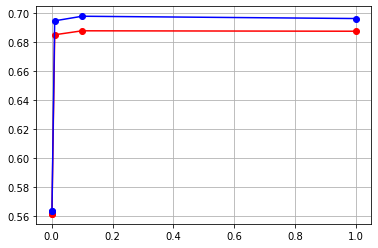

In [14]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
cVals = [0.0001, 0.001, 0.01, 0.1, 1]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()



In [ ]:
#Polynomial Fit Transformation: L1

poly = PolynomialFeatures(degree =3)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)


plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.title("Accuracy vs. C: L1 Regularization with Polynomial Feature Transformation")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [15]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

In [16]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

In [17]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

In [18]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.
    
    # TODO - Create the Logistic Regression model object as described above and save it to logreg2 - 5 points
    logreg2 = linear_model.LogisticRegression(C=c, warm_start=True)

    
    # TODO - Fit the model on the training set - 5 points

    logreg2.fit(X_train, Y_train)

    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg2.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg2
    
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # TODO - Find the prediction on test set - 5 points
    Yhat_test = logreg2.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg2
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg2.append(c)
    

    
    

In [19]:
# Call the above function i.e. logreg_model with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.566211
Accuracy on test data = 0.563536
Accuracy on training data = 0.631250
Accuracy on test data = 0.570639
Accuracy on training data = 0.687500
Accuracy on test data = 0.683504
Accuracy on training data = 0.687109
Accuracy on test data = 0.698500
Accuracy on training data = 0.687598
Accuracy on test data = 0.700079


Accuracy on training data = 0.566211
Accuracy on test data = 0.563536
Accuracy on training data = 0.631250
Accuracy on test data = 0.570639
Accuracy on training data = 0.687500
Accuracy on test data = 0.683504
Accuracy on training data = 0.687109
Accuracy on test data = 0.698500
Accuracy on training data = 0.687598
Accuracy on test data = 0.700079


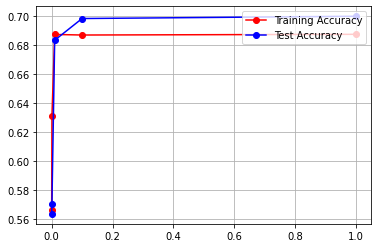

In [20]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

# IMP - Make sure you reinitialize c_logreg2, acc_train_logreg2 and acc_test_logreg2 before rerunning logreg2_model()
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)
plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [21]:
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 

def f(z):
    return 1 / (1 + np.exp(-z))
def f_deriv(z):
    return f(z) * (1 - f(z))

def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 
def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=1000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    lmbda = 0.15
    N = len(y)
    row_len = X.shape[1]
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%100 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            a, z = feed_forward(X.iloc[i,0:row_len], W, b)
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i]-a[l]))
                    #print("lin alg done")
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                        #print("hidden delta done")
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    tri_b[l] += delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        avg_cost = 1.0/N * avg_cost 
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    row_len = X.shape[1]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X.iloc[i,0:row_len], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

nn_structure = [3, 6, 1]

    
# train the NN
print(Y_train.shape)
W, b, avg_cost_func = train_nn(nn_structure, X_train, Y_train, 1000)

(10240,)
Starting gradient descent for 1000 iterations
Iteration 0 of 1000


<ipython-input-21-312529043eba>:69: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))


Iteration 100 of 1000
Iteration 200 of 1000
Iteration 300 of 1000
Iteration 400 of 1000
Iteration 500 of 1000
Iteration 600 of 1000
Iteration 700 of 1000
Iteration 800 of 1000
Iteration 900 of 1000


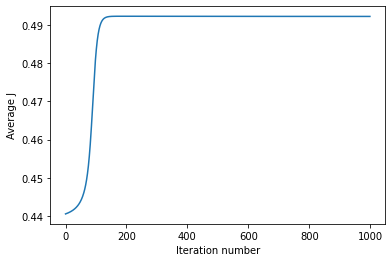

Prediction accuracy is 43.646408839779006%


In [26]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(Y_test, y_pred) * 100))